# Automobile Price Prediction

In this notebook, we will go through the process of creating a machine learning model to predict the price of automobiles. we will use "Automobile prices Training.csv" dataset which we will explore, clean, visualise, and perform the appropraite feature engineering and selection. At the end, we will apply the machine learning algorithm, and measure our predicted results against the actual values.

importing the packages needed for the practical

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Importing the **Automobile prices Training.csv** dataset.

In [65]:
df = pd.read_csv("Automobile prices Training.csv")

In [66]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,0.831633,98.730102,174.057143,65.917857,53.720408,2562.387755,127.372449,10.054133,25.091837,30.658163
std,1.251551,6.013597,12.377846,2.165756,2.446492,521.190474,42.160123,3.883134,6.585278,6.937116
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2163.000000,97.750000,8.500000,19.000000,25.000000
50%,1.000000,96.950000,173.200000,65.500000,54.100000,2422.500000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.100000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Let's have a look at the first 10 rows of data to get a feel for it. 

In [67]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495
1,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1.0,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.4,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.4,8.0,115,5500,18.0,22.0,17450
5,2.0,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136.0,mpfi,3.19,3.4,8.5,110,5500,19.0,25.0,15250
6,1.0,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136.0,mpfi,3.19,3.4,8.5,110,5500,19.0,25.0,17710
7,1.0,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136.0,mpfi,3.19,3.4,8.5,110,5500,19.0,25.0,18920
8,1.0,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131.0,mpfi,3.13,3.4,8.3,140,5500,17.0,20.0,23875
9,0.0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131.0,mpfi,3.13,3.4,7.0,160,5500,16.0,22.0,?


and a look at the data types.

In [68]:
df.dtypes

symboling            float64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg             float64
highway-mpg          float64
price                 object
dtype: object

There is an issue with type of some columns, eg:"normalized-losses" . we expected it to be int

In [69]:
df['normalized-losses'].value_counts().head()

?      40
161    11
91      8
150     7
134     6
Name: normalized-losses, dtype: int64

We can see that some columns we expect to be numeric are given as objects. This is due to there being '?' in some of the unknown fields. In order to carry out a data science, we need the columns to be of the correct data types. Therefore, we will replace the '?' character with Nulls.

In [70]:
df.replace('?', np.nan, inplace=True)

<AxesSubplot:>

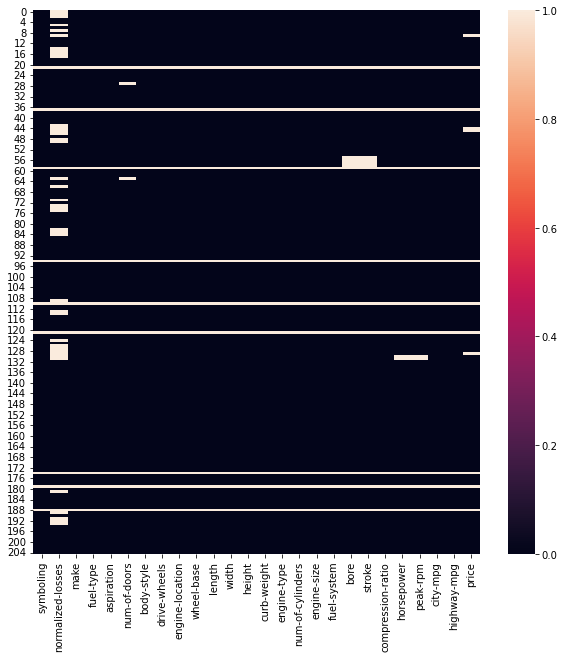

In [71]:
plt.subplots(figsize = (10,10))
sns.heatmap(df.isnull())

In [72]:
df.dtypes

symboling            float64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg             float64
highway-mpg          float64
price                 object
dtype: object

We have replaced the '?' with blanks. We will now be able to select the columns which need to be converted to a numeric data type, and change them. To do this, we use a Pandas function, called **.to_numeric()**. Let's try it on one of the columns
**errors** argument tells the function what to do when an error is encountered, that is, when a value cannot be parsed as a numeric type. The **coerce** parameter will change all errors to NaN's. 

In [73]:
df['price'] = pd.to_numeric(df['price'], errors = 'coerce')

In [74]:
df.dtypes

symboling            float64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

Let's use the **.apply()** function to apply the **.to_numeric()** function to all of the appropraite columns in the dataframe. First, we need to make a list of columns whose data types we want to change.

In [75]:
numeric_cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']

Then we use the **.apply()** function to te appropriate columns, as shown in the cell below.

In [76]:
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce')

We can now check the data types again.

In [77]:
df.dtypes

symboling            float64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

We can see that the data types are now correct. All of the columns we expect to see as nunmeric are numeric.

We can now obtain the summary statistics for the dataframe, using the **.describe()** function.

In [78]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,196.000000,156.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,192.000000,192.000000,196.000000,194.000000,194.000000,196.000000,196.000000,192.000000
mean,0.831633,121.903846,98.730102,174.057143,65.917857,53.720408,2562.387755,127.372449,3.334479,3.250000,10.054133,104.948454,5125.257732,25.091837,30.658163,13373.848958
std,1.251551,35.351831,6.013597,12.377846,2.165756,2.446492,521.190474,42.160123,0.275240,0.322146,3.883134,40.051229,477.885222,6.585278,6.937116,8063.268233
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2163.000000,97.750000,3.150000,3.107500,8.500000,70.000000,4800.000000,19.000000,25.000000,7784.750000
50%,1.000000,115.000000,96.950000,173.200000,65.500000,54.100000,2422.500000,120.000000,3.310000,3.290000,9.000000,96.000000,5200.000000,24.000000,30.000000,10470.000000
75%,2.000000,150.000000,102.100000,183.200000,66.900000,55.500000,2939.250000,142.000000,3.590000,3.410000,9.400000,119.000000,5500.000000,30.000000,34.000000,16525.750000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Visualising data in Python and handling nulls

These visualisations will aid us in selecting the appropriate columns in the dataset for machine learning, or to find correlations in the data.

The first thing we want to do is to determine the existance of null values in the dataset. We do this by calling the Heatmap visual. The argument **fig = plt.figure(figsize=(10, 10))** is used to generate a visual of a decent size on the page. 

<AxesSubplot:>

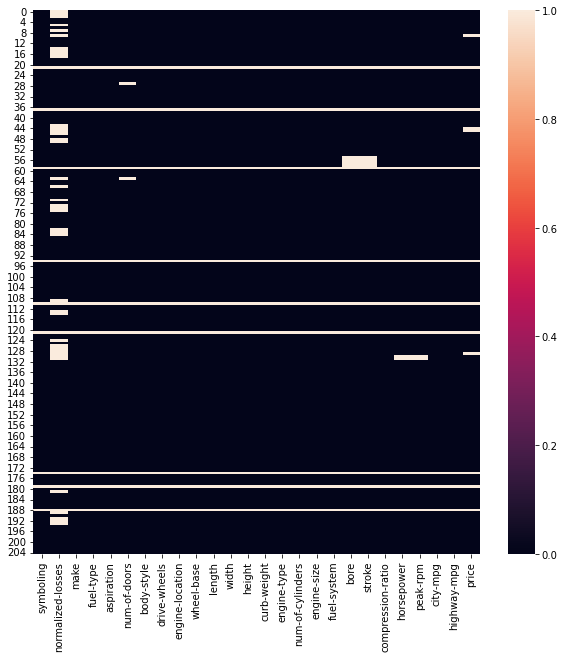

In [79]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df.isnull())

Everywhere the heatmap is black indicates a non-null value. The light coloured areas indicate nulls. The nulls are fairly sparse. With this in mind, we can decide how we want to deal with the nulls.

## Dealing with nulls

Sometimes we simply drop any rows with nulls in them. But we have a significant number of nulls, so we may want to try fill these nulls with something else. Some approaches are to fill nulls with 0, or with the mean/median/mode of the column. Or using forward/back fill values.
In this section, we will be filling/dropping nulls according to the situation.

To get rid of the null values in the columns which contain nulls, we refer to the summary statistics of the dataframe to determine if it is viable to replace the nulls with another value, and if so, which one? We will look at the summary statistics of the dataframe, as well as a pairplot, to visualise the distributions of the values in the selected columns.

We will first drop the rows that have most features missing. we set the threshhold to 1 here so each row with more than 1 non Null value won't be dropped

In [80]:
df.dropna(axis = 0, thresh =  1, inplace = True)

<AxesSubplot:>

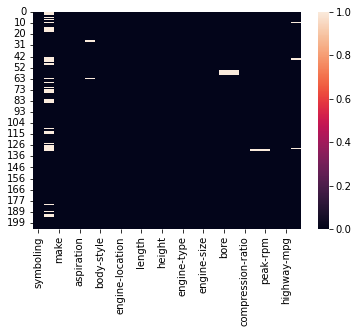

In [81]:
sns.heatmap(df.isnull())

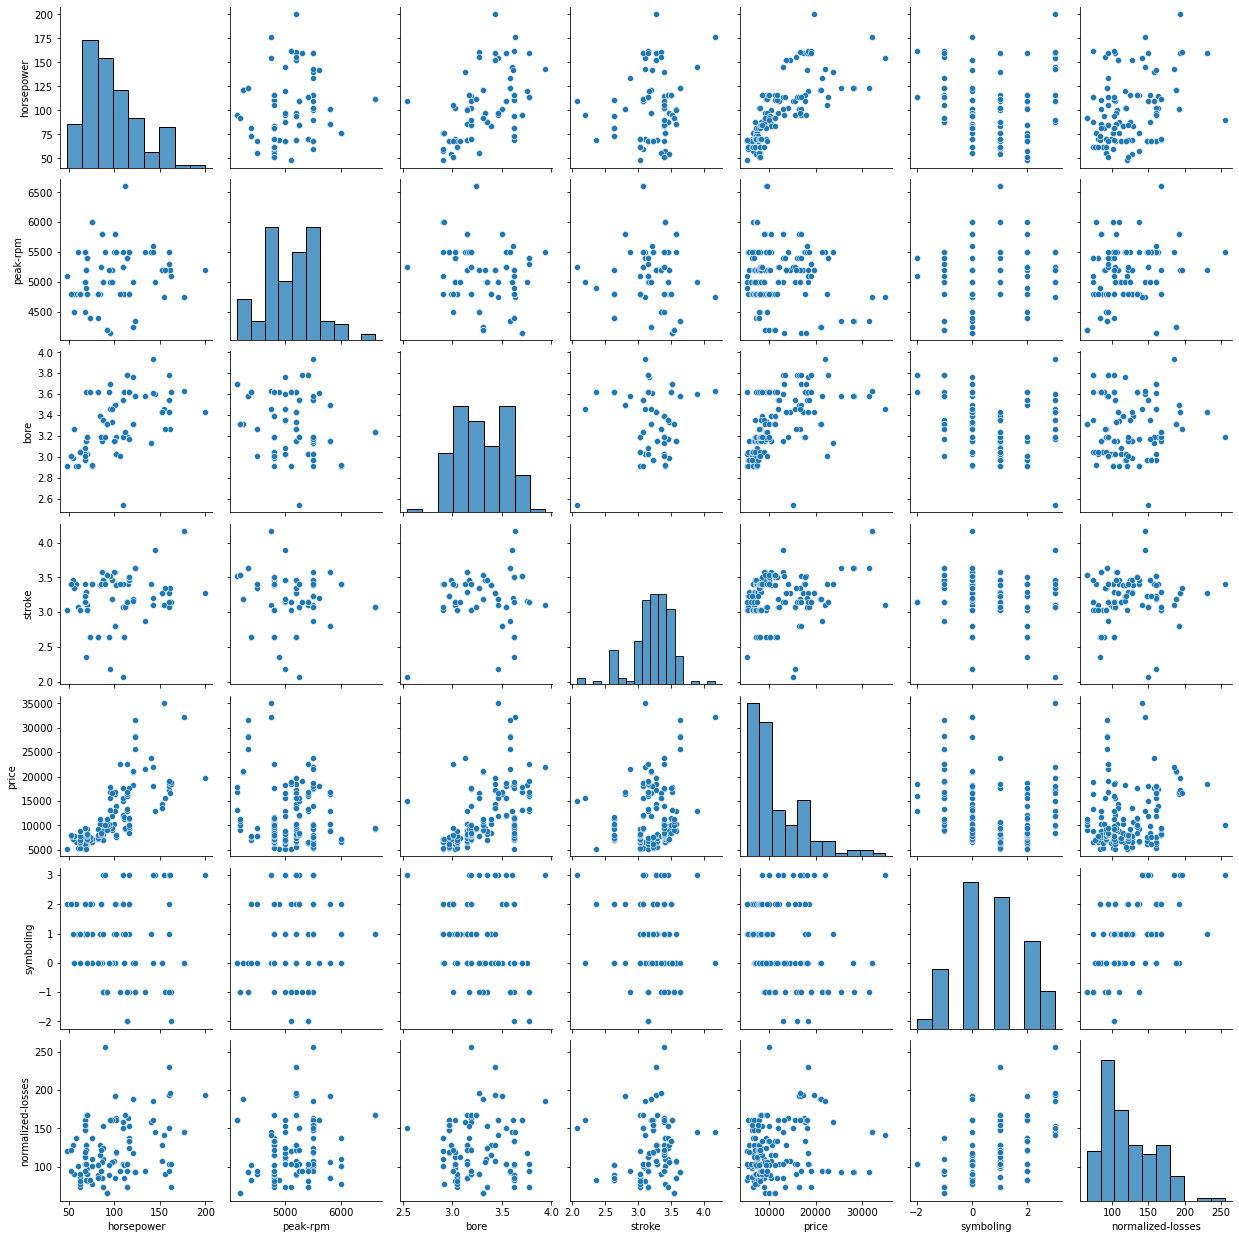

In [82]:
sns.pairplot(df[['horsepower', 'peak-rpm', 'bore', 'stroke', 'price', 'num-of-doors', 'symboling', 'normalized-losses']].dropna())

It appears as if the values for the **peak-rpm**, **bore** and **stroke** columns are normally distributed. Replacing the missing data with the avareage is a good practice in normally distributed data. We will therefore replace the nulls in the **peak-rpm**, **bore** and **stroke** columns with their respective averages. 

In [83]:
df[['peak-rpm', 'bore', 'stroke']] = df[['peak-rpm', 'bore', 'stroke']].fillna(df[['peak-rpm', 'bore', 'stroke']].mean())

The **horsepower** and **price** column values are skewed to the right. As it appears that the price and the horsepower appear to vary linearly with respect to each other, we will sort the dataframe according to the price, and then use the forward fill method on the horsepower, and then we will sort the dataframe according to horsepower, and then use the forward fill method on the price column.

In [84]:
df.sort_values('horsepower', inplace = True)
df['price'].fillna(method = 'ffill', inplace = True)

In [85]:
df.sort_values('price', inplace = True)
df['horsepower'].fillna(method = 'ffill', inplace = True)

The **symboling** and **normalized-losses** columns appeared to have no correlation with respect to price. Further, the **normalized-losses** column contained many null values. We will therefore drop these columns.

In [86]:
df.drop('normalized-losses', axis = 1, inplace = True)
df.dropna(inplace = True)

We can now check the dataframe again to see if the nulls have all been dealt with.

<AxesSubplot:>

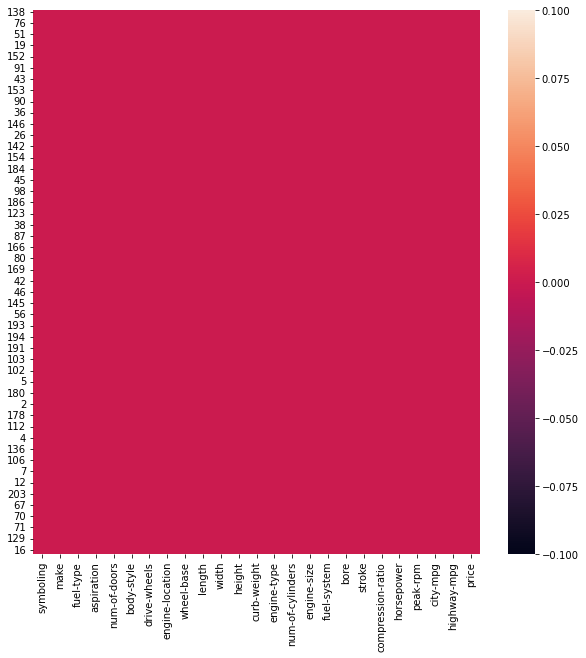

In [87]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df.isnull())

Since we want to predict the price of the automobiles, let us have a look at the distribution of the price column. Using the **.distplot()** function, with 20 bins, display a distribution plot of the price data.

C:\Users\Shams\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

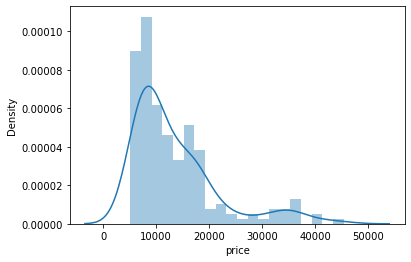

In [88]:
sns.distplot(df['price'], bins = 20)

We may want to compare the price of the automobile against some other parameters. For example, sports cars, with higher horsepower outputs would tend to be more expensive than smaller city cars. Let's investigate. Use the **.jointplot()** function to determine the relationship between **price** and **horsepower**.

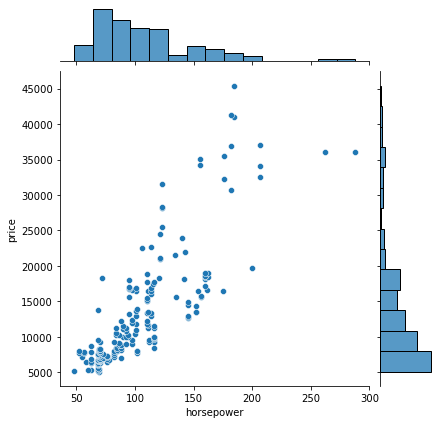

In [89]:
sns.jointplot(x = 'horsepower', y = 'price', data = df)

Our hypotheis seems to be correct. However, there are several other columns against which we can compare the price. for the rest, we can use the PairGrid function.

In this visual, we want to compare price against all of the other numerical columns.

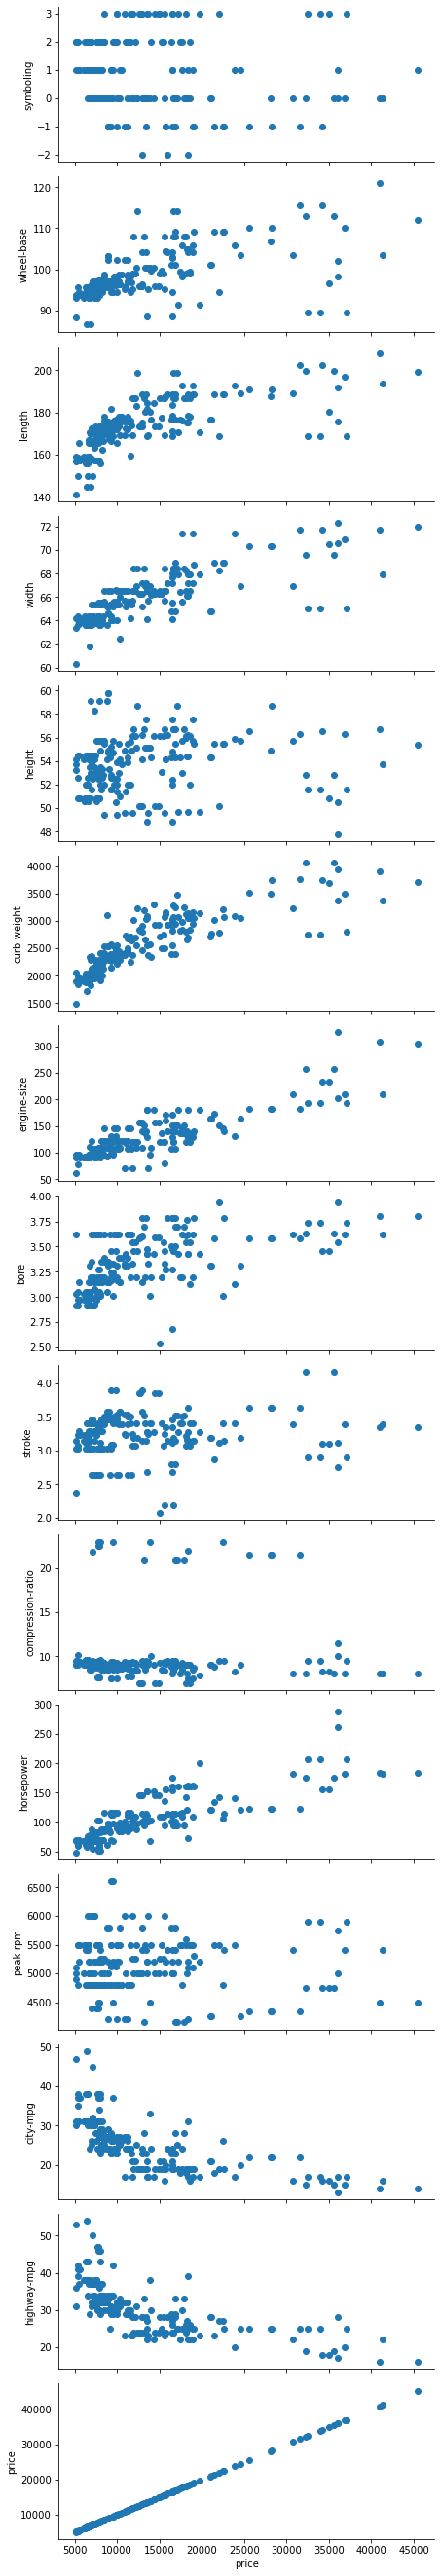

In [90]:
g = sns.PairGrid(data = df, x_vars = 'price', y_vars = df.select_dtypes(['int64', 'float64']).columns, aspect = 2.5)
g.map(plt.scatter)

There are several numeric columns that seem to have a relationship with price. Length and wheel base seem to be positively correlated with price, while mpg (fuel economy) seems to have a negative correlation, although these correlations are not linear. In order to run a useful machine learning model, if we could modify the values in a column such that any correlations are linear, that would be beneficial.

Price data is skewed. In order to linearise the price column, we will take the natural logarithm of this column. 

In [91]:
df['price'] = df['price'].apply(np.log)

C:\Users\Shams\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

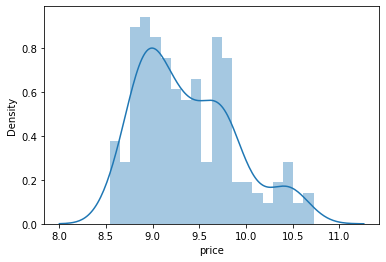

In [92]:
sns.distplot(df['price'], bins = 20)

We can now run the same PairGrid again to see if the variation of price vs fuel consumption is now linear.

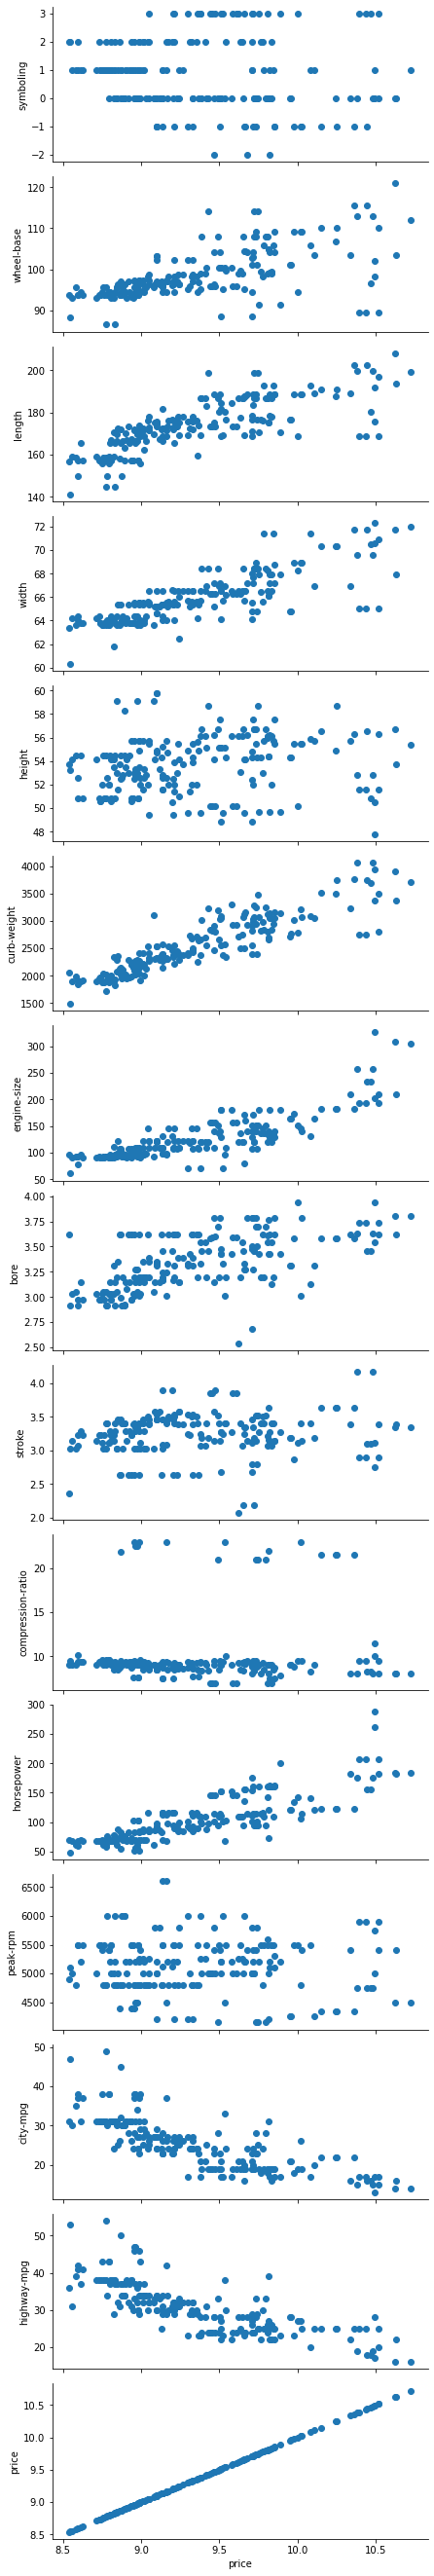

In [93]:
g = sns.PairGrid(data = df, x_vars = 'price', y_vars = df.select_dtypes(['int64', 'float64']).columns, aspect = 2.5)
g.map(plt.scatter)

From these visuals, it appears that taking the natural logarithm of the price column seems to have increased the linearity of the price column when compared against the other columns in the dataset.

## Normalising data

The next concept to look at is normalising the data. To illustrate this concepte, we can plot **curb-weight** vs **width**

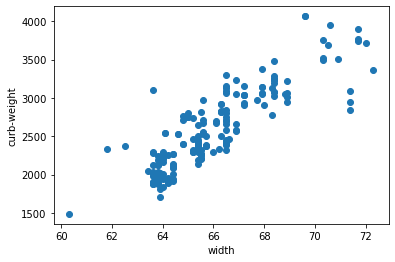

In [94]:
plt.xlabel('width')
plt.ylabel('curb-weight')
plt.scatter(x = df['width'], y = df['curb-weight'])

We can see that the magnitude of the width of the automobiles is in the 10s and the magnitude of the weight is in the 1000s. There is 2 orders of magnitude difference between these two features. Therefore, a machine learning algorithm will  infer that the curb-weight is a more important feature because its values are larger in magnitude than those of the width. 

We therefore want to normalise the data. This effectively means that we will be taking each column and setting its minimum value to be 0 and its maximum value to be 1. The values of the rest of the data will be scaled such that their distibution between the minimum and the maximum will remain the same as they were in the original column. The purpose of doing this is to ensure that all of the columns in the dataframe are approximately the same scale, such that a machine learning algorithm does not assign more importance to a column simply because its values are greater in magnitude. We want to exclude the price from the normalisation, as this is the target column for our machine learning.

In [95]:
for col in df.drop('price', axis = 1):
    if df[col].dtype in ['float64', 'int64']:
        print(col)

symboling
wheel-base
length
width
height
curb-weight
engine-size
bore
stroke
compression-ratio
horsepower
peak-rpm
city-mpg
highway-mpg


In [96]:
from sklearn import preprocessing

for col in df.drop('price', axis = 1): # we want to exclude 'price'
    if df[col].dtype in ['float64', 'int64']:
        x = df[[col]].values.astype(float) # We want to take column values as float and normalize it
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        df[[col]] = x_scaled

We can now rerun the scatter plot to see if the values are in a similar scale.

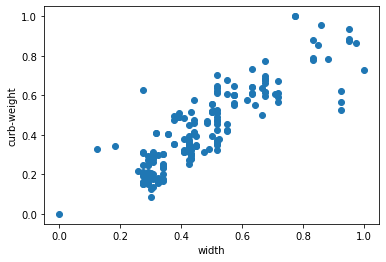

In [97]:
plt.xlabel('width')
plt.ylabel('curb-weight')
plt.scatter(x = df['width'], y = df['curb-weight'])

The shape of the plots both look the same, but you will notice that the scale of the values for the **width** and the **curb-weight** is similar.

Now that we have visualised and compared the **price** column to all of the numeric columns, we will do the same thing and compare the **price** column to the non-numeric columns, also using a PairGrid.

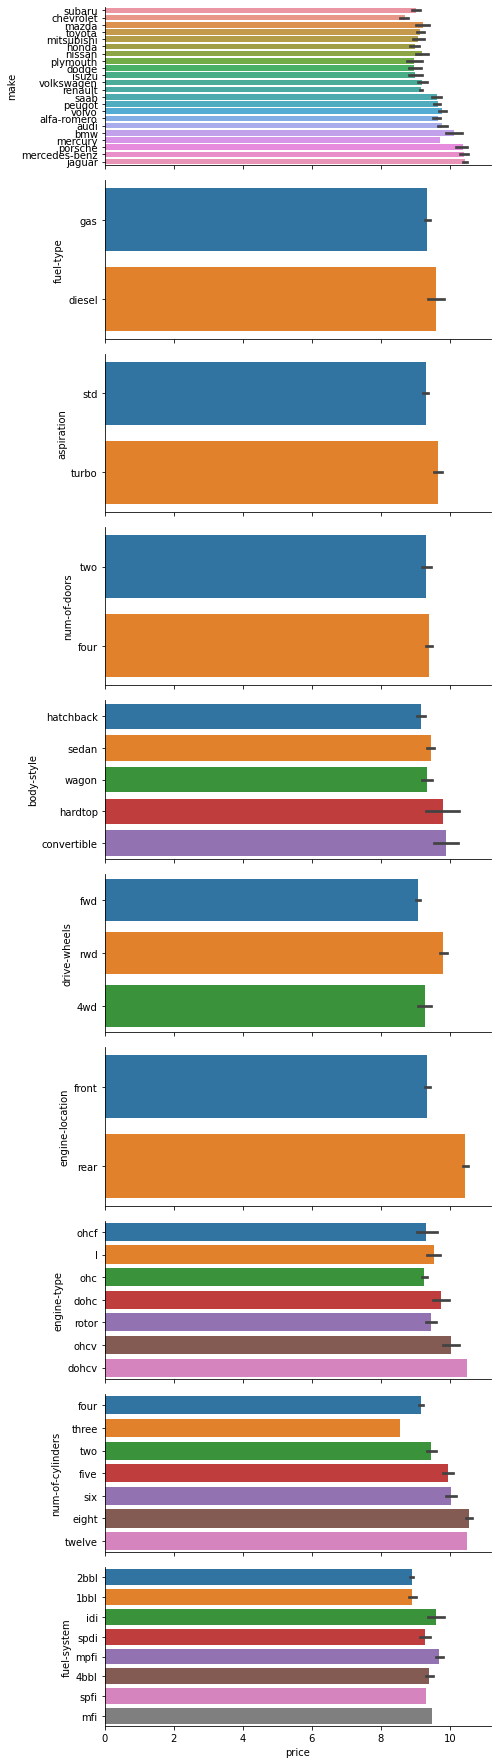

In [98]:
g = sns.PairGrid(data = df, x_vars = 'price', y_vars = df.select_dtypes(['object']).columns, aspect = 2.5)
g.map(sns.barplot)

There are some clear relationships for the non-numeric columns and price. The number of cyclinders seems to have a strong relationship, as does the drive wheels, make and body type. 

## Feature encoding

We need to represent all of the non-numeric columns as numerical values. This is called encoding. Let us get a list of categorical variables in our dataframe.

In [99]:
categorical_features = df.select_dtypes(include = ['object']).columns
categorical_features

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

There are two columns, namely **num-of-cylinders** and **num-of-doors** which contain number values, but written out as strings (**'two'**, instead of **'2'**). For these columns, we will create a dictionary in which we map each numeric value to its corresponding string representation. These columns represent **ordinal categorical** data. There is an inherent order to them. 

In [100]:
num_cleanup = {0:'zero',1:'one',2:'two',
               3:'three',4:'four',5:'five',
               6:'six',7:'seven',8:'eight',9:'nine',
               10:'ten',11:'eleven',12:'twelve'}

With this mapping, we will now create a dictionary of dictionaries; the keys to this dictionary will be the names of the two columns in our dataframe which contain the ordinal data. To make the nested dictionary easier to work with, we will create a dataframe and work with that instead.

In [101]:
num_dict = {'num-of-doors': num_cleanup, 'num-of-cylinders': num_cleanup}

As we will be using this dictionary later when we make predictions on unseen data, we want to save the dictionary to disk. Therefore, we write it to disk, and set the **index = False** parameter.

In [102]:
num_df = pd.DataFrame(num_dict)
num_df.head()

,num-of-doors,num-of-cylinders
0,zero,zero
1,one,one
2,two,two
3,three,three
4,four,four


In [103]:
num_df.to_csv(r'C:\Users\Shams\Desktop\Codes\Datasets\num_df.csv', index = False)

We will now loop through the automobiles dataframe, and for each column in the dataframe whose column header matches a key in the **num_df** nested dictionary, we will replace the values in that dataframe column with those in the dictionary. 

In [104]:
for key in dict(num_df).keys():
    d = {value:key for key, value in dict(num_df[key]).items()}
    df[key].replace(d, inplace = True)

 When dealing with data, ensuring the data types are corect is vitally important. If we consider the non-numerical data types, we will realise that they are actually categorical types. Therefore, we will convert the data in these columns to the categorical data type.

For the remaining categorical columns, we will use the built-in Pandas function for categorical data encoding, **.cat.codes**. But first, we want to create a dictionary of these category encodings, such that we can use the exact same category encodings for our validation set.

In [105]:
categorical_features = df.select_dtypes(include = ['object']).columns

In [106]:
categorical_features

Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'fuel-system'],
      dtype='object')

In [107]:
df[categorical_features] = df[categorical_features].astype('category')

In [108]:
cat_dict = {}
for cat in df[categorical_features].columns:
    d = dict(enumerate(df[cat].cat.categories))
    cat_dict[cat] = d
    
print(cat_dict)

{'make': {0: 'alfa-romero', 1: 'audi', 2: 'bmw', 3: 'chevrolet', 4: 'dodge', 5: 'honda', 6: 'isuzu', 7: 'jaguar', 8: 'mazda', 9: 'mercedes-benz', 10: 'mercury', 11: 'mitsubishi', 12: 'nissan', 13: 'peugot', 14: 'plymouth', 15: 'porsche', 16: 'renault', 17: 'saab', 18: 'subaru', 19: 'toyota', 20: 'volkswagen', 21: 'volvo'}, 'fuel-type': {0: 'diesel', 1: 'gas'}, 'aspiration': {0: 'std', 1: 'turbo'}, 'body-style': {0: 'convertible', 1: 'hardtop', 2: 'hatchback', 3: 'sedan', 4: 'wagon'}, 'drive-wheels': {0: '4wd', 1: 'fwd', 2: 'rwd'}, 'engine-location': {0: 'front', 1: 'rear'}, 'engine-type': {0: 'dohc', 1: 'dohcv', 2: 'l', 3: 'ohc', 4: 'ohcf', 5: 'ohcv', 6: 'rotor'}, 'fuel-system': {0: '1bbl', 1: '2bbl', 2: '4bbl', 3: 'idi', 4: 'mfi', 5: 'mpfi', 6: 'spdi', 7: 'spfi'}}


We want to retain these encodings, because, when we run the prediction on previously unseen data, we will need to use these encodings to encode the validation set in the same way as we have done for the training set.

In [109]:
cat_df = pd.DataFrame(cat_dict)
print(cat_df)
cat_df.to_csv(r'C:\Users\Shams\Desktop\Codes\Datasets\cat_df.csv', index = False)

             make fuel-type aspiration   body-style drive-wheels  \
0     alfa-romero    diesel        std  convertible          4wd   
1            audi       gas      turbo      hardtop          fwd   
2             bmw       NaN        NaN    hatchback          rwd   
3       chevrolet       NaN        NaN        sedan          NaN   
4           dodge       NaN        NaN        wagon          NaN   
5           honda       NaN        NaN          NaN          NaN   
6           isuzu       NaN        NaN          NaN          NaN   
7          jaguar       NaN        NaN          NaN          NaN   
8           mazda       NaN        NaN          NaN          NaN   
9   mercedes-benz       NaN        NaN          NaN          NaN   
10        mercury       NaN        NaN          NaN          NaN   
11     mitsubishi       NaN        NaN          NaN          NaN   
12         nissan       NaN        NaN          NaN          NaN   
13         peugot       NaN        NaN          

Now, we will change the values in the dataframe to their encoded values. 

In [110]:
for cat in df[categorical_features].columns:
    df[cat] = df[cat].cat.codes

We will now take the newly encoded dataframe and use this to create our training and testing sets.

# Machine Learning

Now that we have visualised and cleaned our data, and ensured that there are no nulls, we will apply a machine learning model to it to see if we can determine the price. We will be using the **scikit-learn** package to carry out the machine learning. As price is a continuous variable, this is a regression problem; we would like to determine a particular value.

In [111]:
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split as tts

We need to split the dataset into the feautres and labels. The features are all of the columns in the dataset, and the labels (or target), is the price column. 

In [112]:
x = df.drop('price', axis = 1)
y = df['price']

In [113]:
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.3, random_state = 42)

The type of machine learning model we are using is the linear regression. The first thing we do is define the model.

In [114]:
model = lm.LinearRegression()

Now we can try and fit the data to the model. We do this by using the .fit() function on the model.

In [115]:
model.fit(x_train, y_train)

LinearRegression()

In the cell below, we will use the model to make a prediction against our test set. We save the result as **pred**.

In [116]:
pred = model.predict(x_test)

## Model evaluation

In order to test the usefulness of our model, we need to evaluate it. There are several functions within scikit-learn that we can use to test various different machine learning models. In this case, we are interested in metrics which measure regression algorithms. 

In [117]:
from sklearn import metrics

The mean absolute error (MAE) is the mean of all of the errors. The **error** is defined as the difference between the predicted value and the actual value. The smaller, the better.

The mean squared error (MSE) is the mean of the squares of all the errors. This means that we take the difference between the predicted value and the actual value, and square the result; this is called the **squared error**. We then take the mean of these squared errors. The point of doing this is that, if there are a some of predicted values which differ significantly from the actual values, these errors will be penalised more than errors which are smaller. We could take the square root of this value to obtain an error which is in the same units as the target column. The smaller, the better.

The R-Squared value is a measure of how well the regression line fits the data. The larger, the better, with a maximum value of 1.

Recall, when we were preparing the data for machine learning, we discovered that the price varies non-linearly with respect to several other features, and we therefore made predicitions against the log(price). The reverse operation for a logarithm is the exponential, so to obtain a true reflection of how well our model predicts, we will take the exponential of the prediction and actual values and pass these into metrics functions.

In [118]:
MAE = metrics.mean_absolute_error(np.exp(y_test), np.exp(pred))
MSE = metrics.mean_squared_error(np.exp(y_test), np.exp(pred))
R2 = metrics.r2_score(np.exp(y_test), np.exp(pred))

print(f'Mean Absolute Error = ', np.round(MAE, 2))
print(f'Mean Squared Error = ', np.round(np.sqrt(MSE), 2))
print(f'R-Squared Value = ', np.round(R2, 4))

Mean Absolute Error =  1761.67
Mean Squared Error =  2409.08
R-Squared Value =  0.8885


To gain an understanding of how each of the features contribute to the prediction of the model, we can call the **model.coef_** function. This gives us the coefficients of the linear equation. The higher magnitude coefficients have a greater impact on the predictions.

In [119]:
pd.DataFrame(data = [df.columns, model.coef_]).transpose().sort_values(by = 1)

,0,1
22,city-mpg,-0.483609
18,stroke,-0.202903
8,wheel-base,-0.084549
5,body-style,-0.077529
14,num-of-cylinders,-0.017455
1,make,-0.011842
13,engine-type,-0.001643
16,fuel-system,0.015556
3,aspiration,0.022768
17,bore,0.034072


In the following cell, we will create a dataframe which shows the testing dataset together with the predicted results, such that we can see the difference for individual rows in the data. 

In [120]:
x_test_full = x_test 
x_test_full['price'] = np.exp(y_test)
x_test_full['prediction'] = np.exp(pred)
x_test_full['diff'] = x_test_full['price']- x_test_full['prediction']
x_test_full = pd.DataFrame(x_test_full)

C:\Users\Shams\AppData\Local\Temp/ipykernel_1724/1667986269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_full['price'] = np.exp(y_test)
C:\Users\Shams\AppData\Local\Temp/ipykernel_1724/1667986269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_full['prediction'] = np.exp(pred)
C:\Users\Shams\AppData\Local\Temp/ipykernel_1724/1667986269.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [121]:
x_test_full

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,prediction,diff
196,0.0,21,1,0,4,3,2,0,0.516035,0.711940,...,0.885714,0.514286,0.15625,0.275000,0.510204,0.305556,0.315789,15985.0,15085.800884,899.199116
152,0.6,19,1,0,4,2,1,0,0.265306,0.262687,...,0.364286,0.457143,0.12500,0.058333,0.265306,0.500000,0.578947,6488.0,6555.224012,-67.224012
116,0.4,13,0,1,4,3,2,0,0.620991,0.680597,...,0.828571,0.690476,0.87500,0.195833,0.000000,0.416667,0.447368,17950.0,18768.807902,-818.807902
42,0.6,5,1,0,2,3,1,0,0.288630,0.417910,...,0.435714,0.719048,0.13125,0.216667,0.551020,0.333333,0.394737,10345.0,8985.054816,1359.945184
186,0.8,20,1,0,4,3,1,0,0.311953,0.456716,...,0.464286,0.633333,0.12500,0.154167,0.448980,0.388889,0.473684,8495.0,9109.622399,-614.622399
172,0.8,19,1,0,2,0,2,0,0.344023,0.523881,...,0.771429,0.680952,0.14375,0.283333,0.265306,0.305556,0.368421,17669.0,15404.007367,2264.992633
183,0.8,20,1,0,2,3,1,0,0.311953,0.456716,...,0.464286,0.633333,0.12500,0.154167,0.448980,0.388889,0.473684,7975.0,8264.157661,-289.157661
30,0.8,5,1,0,2,2,1,0,0.000000,0.052239,...,0.264286,0.638095,0.16250,0.041667,0.265306,1.000000,1.000000,6479.0,4685.891478,1793.108522
193,0.4,20,1,0,4,4,1,0,0.402332,0.626866,...,0.464286,0.633333,0.12500,0.166667,0.551020,0.333333,0.394737,12290.0,9998.935614,2291.064386
133,0.8,17,1,0,4,3,1,0,0.364431,0.679104,...,0.714286,0.476190,0.14375,0.258333,0.448980,0.222222,0.315789,12170.0,14345.436155,-2175.436155


## Preserving a machine learning model

Now that we have create a machine learning model, we can save the model. We would like to train the model once, and save that model for later consumption. Therefore, we will be using the **pickle** package to preserve the model. 

In [122]:
import pickle
from io import StringIO
from io import BytesIO
import codecs

In [132]:
pickle.dump(model, open("pickle", 'wb'))